In [1]:
import numpy as np
import pandas as pd
import re

In [ ]:
def verdict_to_int(verdict_str):
    if 'Оставить' in verdict_str.split():
        return 0
    if (('Отменить' in verdict_str.split()) 
          or ('Изменить' in verdict_str.split())):
        return 1

def len_txt(text):
    len_t = len(str(text).split())
    return len_t

In [2]:
data1 = pd.read_csv('mosgorsud.csv')
data2 = pd.read_csv('mosgorsud01.csv')
data3 = pd.read_csv('mosgorsud02.csv')
data4 = pd.read_csv('mosgorsud03.csv')

data = pd.concat([data1, data2, data3, data4])

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82145 entries, 0 to 21026
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          82048 non-null  object
 1   side        82145 non-null  object
 2   date1       82145 non-null  object
 3   date2       82145 non-null  object
 4   category    82095 non-null  object
 5   status      82145 non-null  object
 6   verdict     7289 non-null   object
 7   verdict_up  82145 non-null  object
 8   reason      16715 non-null  object
 9   text        82145 non-null  object
dtypes: object(10)
memory usage: 6.9+ MB


In [4]:
data.drop_duplicates(inplace=True)
data['target'] = data['verdict_up'].apply(verdict_to_int)
data = data[data['target'].notna()]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72043 entries, 0 to 21025
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          71953 non-null  object 
 1   side        72043 non-null  object 
 2   date1       72043 non-null  object 
 3   date2       72043 non-null  object 
 4   category    72004 non-null  object 
 5   status      72043 non-null  object 
 6   verdict     6981 non-null   object 
 7   verdict_up  72043 non-null  object 
 8   reason      14463 non-null  object 
 9   text        72043 non-null  object 
 10  target      72043 non-null  float64
dtypes: float64(1), object(10)
memory usage: 6.6+ MB


In [6]:
def find_pdf(text):
    if (text.find('%PDF') >= 0):
        return 1
    else:
        return 0

In [7]:
data['pdf'] = data['text'].apply(find_pdf)

In [8]:
data['pdf'].sum()

53

In [9]:
data = data[data['pdf']==0]

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71990 entries, 0 to 21025
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          71900 non-null  object 
 1   side        71990 non-null  object 
 2   date1       71990 non-null  object 
 3   date2       71990 non-null  object 
 4   category    71951 non-null  object 
 5   status      71990 non-null  object 
 6   verdict     6962 non-null   object 
 7   verdict_up  71990 non-null  object 
 8   reason      14453 non-null  object 
 9   text        71990 non-null  object 
 10  target      71990 non-null  float64
 11  pdf         71990 non-null  int64  
dtypes: float64(1), int64(1), object(10)
memory usage: 7.1+ MB


In [12]:
def clear_words(text):
    
    text1 = text.replace('российской федерации', '')
    text2 = text1.replace('соответствии', '')
    text3 = text2.replace(' ст ', '')
    text4 = text3.replace(' гк ', '')
    text5 = text4.replace(' рф ', '')
    text6 = text5.replace(' в ', '')
    text7 = text6.replace(' с ', '')
    text8 = text7.replace('размере', '')
    text9 = text8.replace('а также', '')
    text10 = text9.replace('также', '')
    text11 = text10.replace('решение', '')
    text12 = text11.replace('р е ш е н и е', '')
    text13 = text12.replace('уид', '')
    text14 = text13.replace('именем', '')
    text15 = text14.replace('№', ' ')
    text16 = text15.replace('город', ' ')
    text17 = text16.replace('города', ' ')
    return text17

In [13]:
def clear_num_delo(text):
    return " ".join(re.sub(r'\d-\d{1,4}\/\d{2,4}', ' ', text.lower()).split())

In [14]:
def clear_num_uid(text):
    return " ".join(re.sub(r'\S{8}-\d{2}-\d{4}-\d{6}-\d{2}', ' ', text.lower()).split())

In [15]:
def clear_data(text):
    return " ".join(re.sub(r'\d{1,2}\.\d{1,2}\.\d{2,4}', ' ', text.lower()).split())

In [16]:
data['clear_text1'] = data['text'].apply(clear_num_delo)
data['clear_text2'] = data['clear_text1'].apply(clear_num_uid)
data['clear_text3'] = data['clear_text2'].apply(clear_data)
data['clear_text'] = data['clear_text3'].apply(clear_words)

In [17]:
data[['clear_text', 'text']]

,clear_text,text
0,12 октября 2021 года адрес лефортовский рай...,РЕШЕНИЕ именем Российской Федерации 12 октябр...
1,мотивированное изготовлено 18 января 2022 ...,Мотивированное решение изготовлено 21.01.2022 ...
5,01 декабря 2021 года адрес люблинский район...,РЕШЕНИЕ именем Российской Федерации 01 декабр...
6,01 декабря 2021 года адрес люблинский район...,РЕШЕНИЕ именем Российской Федерации 01 декабр...
7,19 апреля 2022 года адрес измайловский рай...,УИД 77RS0010-02-2021-004495-97 РЕШЕНИЕ ИМЕНЕМ ...
...,...,...
21021,04 декабря 2018 года москва басманный рай...,РЕШЕНИЕ Именем Российской Федерации 04 дека...
21022,15 января 2019 года москва басманный райо...,РЕШЕНИЕ Именем Российской Федерации \t \t15 ян...
21023,москва 28 января 2019 года басманный райо...,РЕШЕНИЕ ИМЕНЕМ РОССИЙСКОЙ ФЕДЕРАЦИИ город Мос...
21024,дело адрес дата басманный районный суд ад...,Дело № 2-0134/2019 РЕШЕНИЕ ИМЕНЕМ РОССИЙСКОЙ...


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71990 entries, 0 to 21025
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           71900 non-null  object 
 1   side         71990 non-null  object 
 2   date1        71990 non-null  object 
 3   date2        71990 non-null  object 
 4   category     71951 non-null  object 
 5   status       71990 non-null  object 
 6   verdict      6962 non-null   object 
 7   verdict_up   71990 non-null  object 
 8   reason       14453 non-null  object 
 9   text         71990 non-null  object 
 10  target       71990 non-null  float64
 11  pdf          71990 non-null  int64  
 12  clear_text1  71990 non-null  object 
 13  clear_text2  71990 non-null  object 
 14  clear_text3  71990 non-null  object 
 15  clear_text   71990 non-null  object 
dtypes: float64(1), int64(1), object(14)
memory usage: 9.3+ MB


In [19]:
data.reset_index(drop=True, inplace=True)
data['len_txt'] = data['clear_text'].apply(len_txt)

<AxesSubplot:>

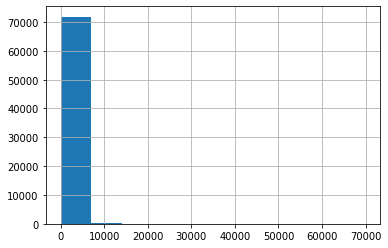

In [20]:
data['len_txt'].hist()

In [21]:
g = data[data['len_txt'] < 6000]

<AxesSubplot:>

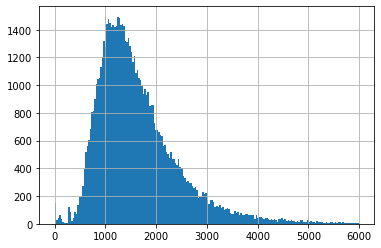

In [22]:
g['len_txt'].hist(bins=200)

In [25]:
data = data.query('len_txt < 6000')

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71691 entries, 0 to 71989
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           71601 non-null  object 
 1   side         71691 non-null  object 
 2   date1        71691 non-null  object 
 3   date2        71691 non-null  object 
 4   category     71652 non-null  object 
 5   status       71691 non-null  object 
 6   verdict      6910 non-null   object 
 7   verdict_up   71691 non-null  object 
 8   reason       14379 non-null  object 
 9   text         71691 non-null  object 
 10  target       71691 non-null  float64
 11  pdf          71691 non-null  int64  
 12  clear_text1  71691 non-null  object 
 13  clear_text2  71691 non-null  object 
 14  clear_text3  71691 non-null  object 
 15  clear_text   71691 non-null  object 
 16  len_txt      71691 non-null  int64  
dtypes: float64(1), int64(2), object(14)
memory usage: 9.8+ MB


In [27]:
data_save = data[['clear_text','target']]

In [28]:
data_save.reset_index(drop=True, inplace=True)
data_save.to_csv('data_clean.csv', index=False)